# Linear Algebra: Matrix Inverses and Determinants

This notebook generates visualizations for the blog post on matrix inverses and determinants.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## Computing the Inverse

In [9]:
# Define a 2x2 matrix
A = np.array([[4, 7],
              [2, 6]])

# Compute the inverse
A_inv = np.linalg.inv(A)

print(f"Matrix A:\n{A}\n")
print(f"Inverse A^(-1):\n{A_inv}\n")

Matrix A:
[[4 7]
 [2 6]]

Inverse A^(-1):
[[ 0.6 -0.7]
 [-0.2  0.4]]



In [10]:
# Verify: A @ A^(-1) = I
product = A @ A_inv
print(f"A @ A^(-1):\n{product}\n")

# Check if it's close to identity
identity = np.eye(2)
print(f"Is A @ A^(-1) = I? {np.allclose(product, identity)}")

A @ A^(-1):
[[ 1.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00]]

Is A @ A^(-1) = I? True


## Geometric Interpretation of the Determinant

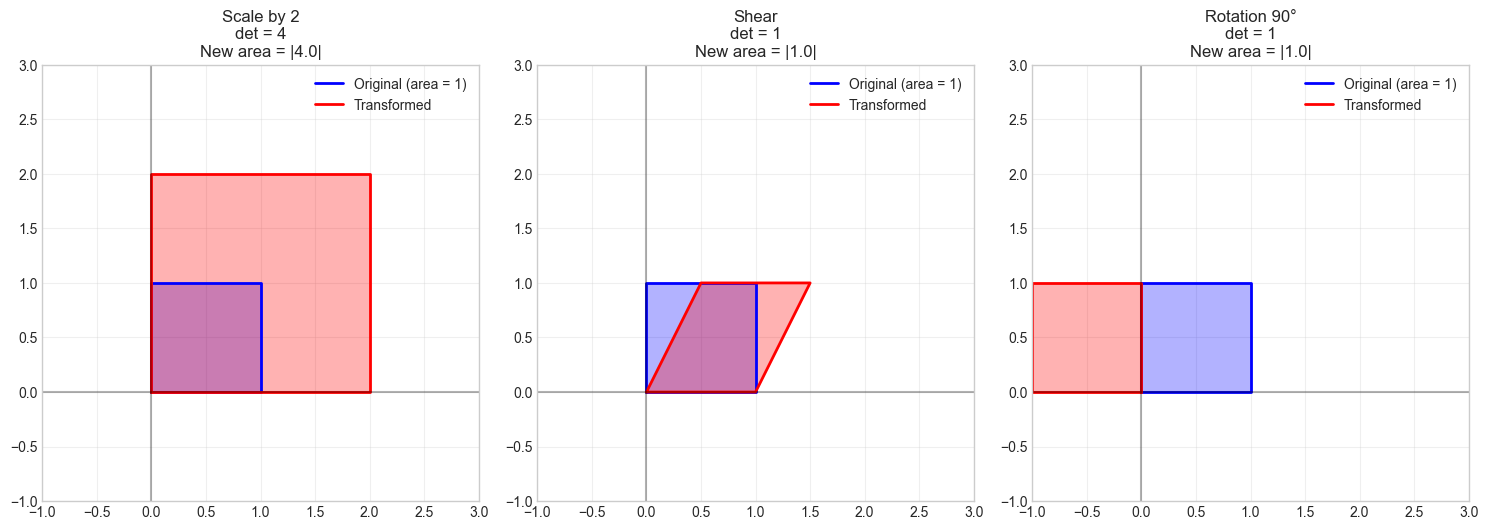

In [11]:
# Visualize the determinant as area scaling
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original unit square
unit_square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).T

# Three different transformations
transforms = [
    np.array([[2, 0], [0, 2]]),      # Scale by 2
    np.array([[1, 0.5], [0, 1]]),    # Shear
    np.array([[0, -1], [1, 0]])      # Rotation 90 degrees
]
titles = ['Scale by 2\ndet = 4', 'Shear\ndet = 1', 'Rotation 90°\ndet = 1']

for ax, T, title in zip(axes, transforms, titles):
    # Plot original unit square
    ax.plot(unit_square[0], unit_square[1], 'b-', linewidth=2,
            label='Original (area = 1)')
    ax.fill(unit_square[0], unit_square[1], alpha=0.3, color='blue')

    # Transform the square
    transformed = T @ unit_square
    ax.plot(transformed[0], transformed[1], 'r-', linewidth=2,
            label=f'Transformed')
    ax.fill(transformed[0], transformed[1], alpha=0.3, color='red')

    det = np.linalg.det(T)
    ax.set_title(f'{title}\nNew area = |{det:.1f}|')
    ax.set_xlim(-1, 3)
    ax.set_ylim(-1, 3)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/determinant-geometric.png', dpi=150, bbox_inches='tight')
plt.show()

## Properties of Determinants

In [12]:
# Create two invertible matrices
A = np.array([[3, 1], [2, 4]])
B = np.array([[1, 2], [3, 1]])

det_A = np.linalg.det(A)
det_B = np.linalg.det(B)

print(f"det(A) = {det_A:.4f}")
print(f"det(B) = {det_B:.4f}")

# Property 1: det(AB) = det(A) * det(B)
det_AB = np.linalg.det(A @ B)
print(f"\ndet(AB) = {det_AB:.4f}")
print(f"det(A) * det(B) = {det_A * det_B:.4f}")

det(A) = 10.0000
det(B) = -5.0000

det(AB) = -50.0000
det(A) * det(B) = -50.0000


## Cramer's Rule

In [13]:
def cramers_rule(A, b):
    """Solve Ax = b using Cramer's Rule."""
    det_A = np.linalg.det(A)
    if np.isclose(det_A, 0):
        raise ValueError("Matrix is singular; Cramer's Rule not applicable")

    n = len(b)
    x = np.zeros(n)

    for i in range(n):
        A_i = A.copy()
        A_i[:, i] = b  # Replace i-th column with b
        x[i] = np.linalg.det(A_i) / det_A

    return x

# Solve the system:
# 3x + y = 9
# 2x + 4y = 14

A = np.array([[3, 1],
              [2, 4]])
b = np.array([9, 14])

# Using Cramer's Rule
x_cramer = cramers_rule(A, b)
print(f"Cramer's Rule solution: {x_cramer}")

# Verify with np.linalg.solve
x_solve = np.linalg.solve(A, b)
print(f"np.linalg.solve:        {x_solve}")

Cramer's Rule solution: [2.2 2.4]
np.linalg.solve:        [2.2 2.4]


## Ill-Conditioned Matrices

In [14]:
# Create a nearly singular (ill-conditioned) matrix
D = np.array([[1, 2],
              [1.0001, 2.0003]])

det_D = np.linalg.det(D)
print(f"Matrix D:\n{D}\n")
print(f"Determinant: {det_D:.6f}")
print(f"Condition number: {np.linalg.cond(D):.2f}")

# Solving with an ill-conditioned matrix can give unreliable results
b1 = np.array([3, 3.0003])
b2 = np.array([3, 3.0004])  # Small change in b

x1 = np.linalg.solve(D, b1)
x2 = np.linalg.solve(D, b2)

print(f"\nSolution for b1: {x1}")
print(f"Solution for b2: {x2}")
print(f"Change in b: {np.linalg.norm(b2 - b1):.6f}")
print(f"Change in x: {np.linalg.norm(x2 - x1):.2f}")

Matrix D:
[[1.     2.    ]
 [1.0001 2.0003]]

Determinant: 0.000100
Condition number: 100014.00

Solution for b1: [ 3. -0.]
Solution for b2: [1. 1.]
Change in b: 0.000100
Change in x: 2.24
